<a href="https://colab.research.google.com/github/sanath8107/strategies/blob/main/mean_crossover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#moving average cross over

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving YESB.csv to YESB (1).csv


In [ ]:
#change the name as per the csv
AAPL = pd.read_csv('YESB.csv')
AAPL

,Date,Price,Open,High,Low,Vol.,Change %
3285,"Jul 13, 2005",11.74,12.20,12.60,11.49,64.11M,-3.53%
3284,"Jul 14, 2005",11.45,12.00,12.00,11.40,16.28M,-2.47%
3283,"Jul 15, 2005",12.37,11.25,12.89,11.25,75.45M,8.03%
3282,"Jul 18, 2005",12.82,12.54,13.14,12.50,75.68M,3.64%
3281,"Jul 19, 2005",12.79,13.00,13.00,12.62,25.45M,-0.23%
...,...,...,...,...,...,...,...
4,"Oct 08, 2018",221.20,210.00,226.60,207.40,62.35M,7.38%
3,"Oct 09, 2018",224.65,225.50,233.80,222.60,49.48M,1.56%
2,"Oct 10, 2018",233.90,229.00,237.00,219.40,52.35M,4.12%
1,"Oct 11, 2018",240.20,222.00,268.95,216.65,94.68M,2.69%


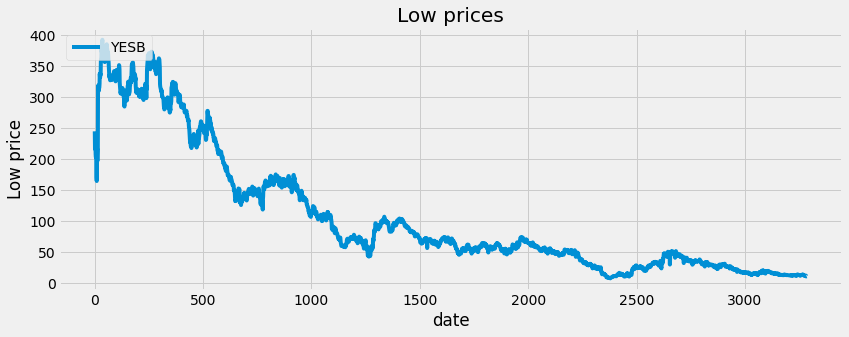

In [ ]:
plt.figure(figsize = (12.5,4.5))
plt.plot(AAPL['Low'],label ='YESB')
plt.title("Low prices")
plt.xlabel("date")
plt.ylabel("Low price")
plt.legend(loc = "upper left")
plt.show()


In [ ]:
SMA30 = pd.DataFrame()
SMA30["Low"] = AAPL['Low'].rolling(window = 1).mean()
SMA30

,Low
0,245.05
1,216.65
2,219.40
3,222.60
4,207.40
...,...
3281,12.62
3282,12.50
3283,11.25
3284,11.40


In [ ]:
SMA100 = pd.DataFrame()
SMA100["Low"] = AAPL['Low'].rolling(window = 3).mean()
SMA100

,Low
0,NaN
1,NaN
2,227.033333
3,219.550000
4,216.466667
...,...
3281,12.556667
3282,12.573333
3283,12.123333
3284,11.716667


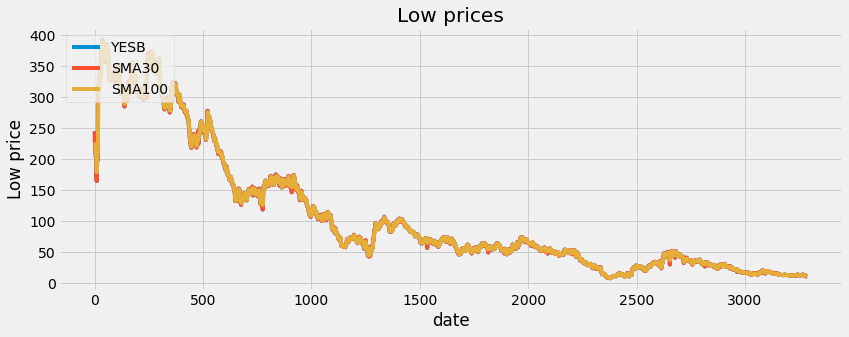

In [ ]:
plt.figure(figsize = (12.5,4.5))
plt.plot(AAPL['Low'],label ='YESB')
plt.plot(SMA30['Low'],label='SMA30')
plt.plot(SMA100['Low'],label='SMA100')
plt.title("Low prices")
plt.xlabel("date")
plt.ylabel("Low price")
plt.legend(loc = "upper left")
plt.show()

In [ ]:
#create new data  frame to store all data
data = pd.DataFrame()
data['AAPL'] = AAPL['Low']
data['SMA30'] = SMA30['Low']
data['SMA100'] = SMA100['Low']
data

,AAPL,SMA30,SMA100
0,245.05,245.05,NaN
1,216.65,216.65,NaN
2,219.40,219.40,227.033333
3,222.60,222.60,219.550000
4,207.40,207.40,216.466667
...,...,...,...
3281,12.62,12.62,12.556667
3282,12.50,12.50,12.573333
3283,11.25,11.25,12.123333
3284,11.40,11.40,11.716667


In [ ]:
def buy_sell_funct(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  x = 0
  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag !=1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        print("Buy : ",data['AAPL'][i])
        x -= data['AAPL'][i]
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i]<data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        print("sell : ",data['AAPL'][i])
        x += data['AAPL'][i]
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  print("net profit:",x)
  return (sigPriceBuy,sigPriceSell)

In [ ]:
buy_sell1 = buy_sell_funct(data)
data['Buy_signal_price'] = buy_sell1[0]
data['Sell_signal_price'] = buy_sell1[1]

sell :  219.4
Buy :  222.6
sell :  207.4
Buy :  202.05
sell :  197.25
Buy :  215.85
sell :  315.95
Buy :  314.6
sell :  332.55
Buy :  337.2
sell :  380.3
Buy :  381.0
sell :  376.5
Buy :  362.0
sell :  362.4
Buy :  381.5
sell :  379.4
Buy :  372.5
sell :  367.45
Buy :  331.05
sell :  329.5
Buy :  331.4
sell :  328.5
Buy :  328.65
sell :  332.55
Buy :  342.0
sell :  338.0
Buy :  340.75
sell :  332.0
Buy :  331.5
sell :  342.0
Buy :  343.6
sell :  341.8
Buy :  342.65
sell :  340.5
Buy :  342.65
sell :  345.1
Buy :  309.0
sell :  307.25
Buy :  308.0
sell :  311.6
Buy :  295.75
sell :  308.2
Buy :  309.8
sell :  301.35
Buy :  308.0
sell :  319.35
Buy :  307.5
sell :  324.0
Buy :  333.6
sell :  352.3
Buy :  335.1
sell :  335.3
Buy :  311.3
sell :  311.8
Buy :  313.35
sell :  310.2
Buy :  310.0
sell :  309.55
Buy :  305.9
sell :  306.55
Buy :  305.1
sell :  309.5
Buy :  312.05
sell :  307.15
Buy :  310.7
sell :  308.2
Buy :  302.0
sell :  302.0
Buy :  305.5
sell :  318.2
Buy :  318.0
sell : 

In [ ]:
data

,AAPL,SMA30,SMA100,Buy_signal_price,Sell_signal_price
0,245.05,245.05,NaN,NaN,NaN
1,216.65,216.65,NaN,NaN,NaN
2,219.40,219.40,227.033333,NaN,219.4
3,222.60,222.60,219.550000,222.60,NaN
4,207.40,207.40,216.466667,NaN,207.4
...,...,...,...,...,...
3281,12.62,12.62,12.556667,NaN,NaN
3282,12.50,12.50,12.573333,NaN,12.5
3283,11.25,11.25,12.123333,NaN,NaN
3284,11.40,11.40,11.716667,NaN,NaN


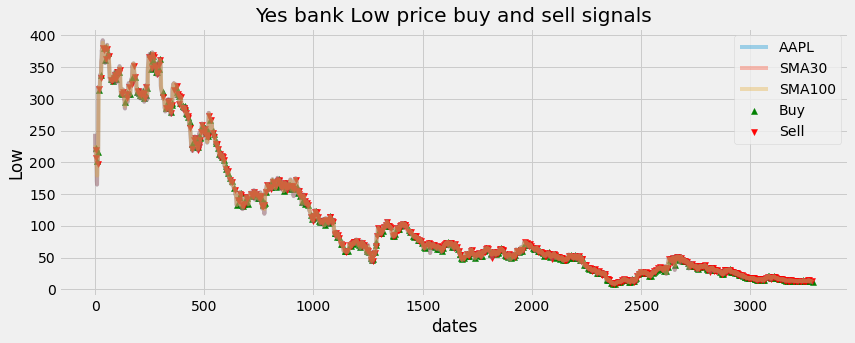

In [ ]:
#visualize the data and strategy
plt.figure(figsize = (12.6,4.6))
plt.plot(data['AAPL'],label = 'AAPL',alpha = 0.35)
plt.plot(data['SMA30'],label= 'SMA30',alpha = 0.35)
plt.plot(data['SMA100'],label = 'SMA100',alpha = 0.35)
plt.scatter(data.index ,data['Buy_signal_price'],label = 'Buy',marker = '^',color = 'green')
plt.scatter(data.index,data['Sell_signal_price'],label = 'Sell',marker = 'v',color = 'red')
plt.title('Yes bank Low price buy and sell signals')
plt.xlabel('dates')
plt.ylabel('Low')
plt.legend(loc='upper right')
plt.show()